## Heart disease prediction [decision tree]

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv('heart_v2.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [9]:
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [10]:
data.shape

(270, 5)

In [11]:
data.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [12]:
#put feature variable to x
X = data.drop('heart disease', axis =1)

In [13]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [14]:
# Put response variable to Y
Y = data['heart disease']

In [15]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

### Train -Test spliting

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [18]:
X_train.shape

(189, 4)

In [19]:
X_test.shape

(81, 4)

### Build decision tree

In [20]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Using all default parameters except depth
dt = DecisionTreeClassifier(max_depth=3)

In [23]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

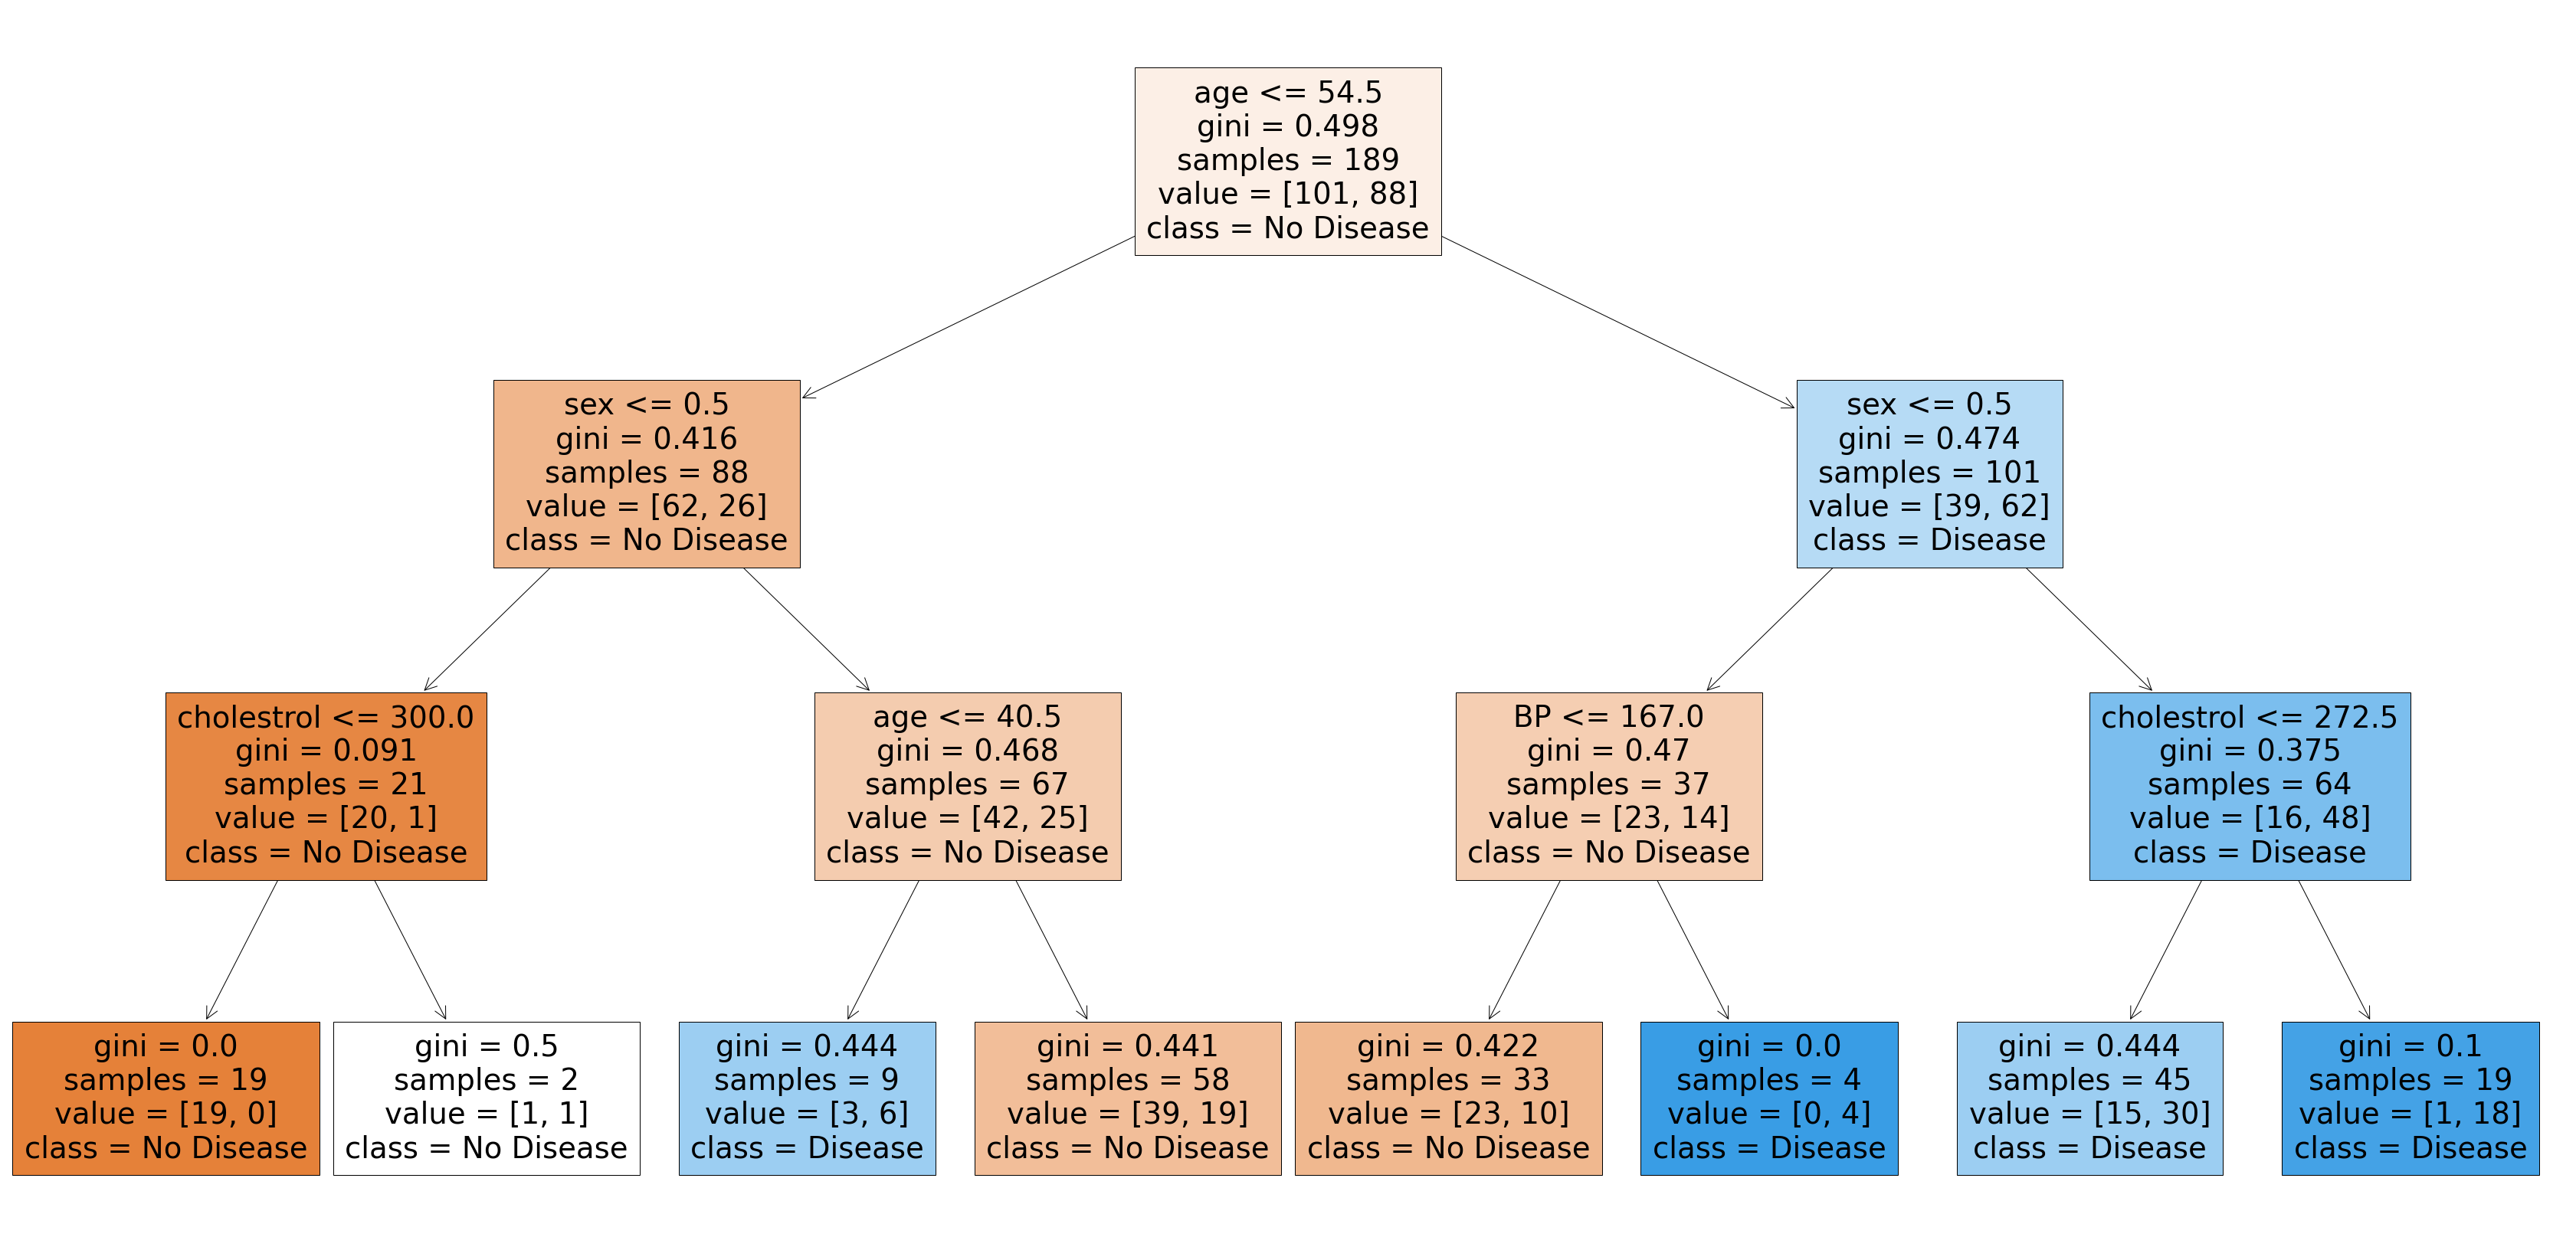

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

In [25]:
Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
print(accuracy_score(Y_train, Y_train_pred))
confusion_matrix(Y_train, Y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [28]:
print(accuracy_score(Y_test, Y_test_pred))
confusion_matrix(Y_test, Y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

In [29]:
#Creating helper functions to evaluate model performance and help plot the decision tree

In [30]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [31]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(Y_train, dt_classifier.predict(X_train)))
    print('Train accuracy matrix')
    print(confusion_matrix(Y_train, dt_classifier.predict(X_train)))
    print("_" *50)
    print("Test Accuracy :", accuracy_score(Y_test, dt_classifier.predict(X_test)))
    print('Test accuracy matrix')
    print(confusion_matrix(Y_test, dt_classifier.predict(X_test)))
    


In [32]:
evaluate_model(dt)

Train Accuracy : 0.7407407407407407
Train accuracy matrix
[[82 19]
 [30 58]]
__________________________________________________
Test Accuracy : 0.6049382716049383
Test accuracy matrix
[[35 14]
 [18 14]]


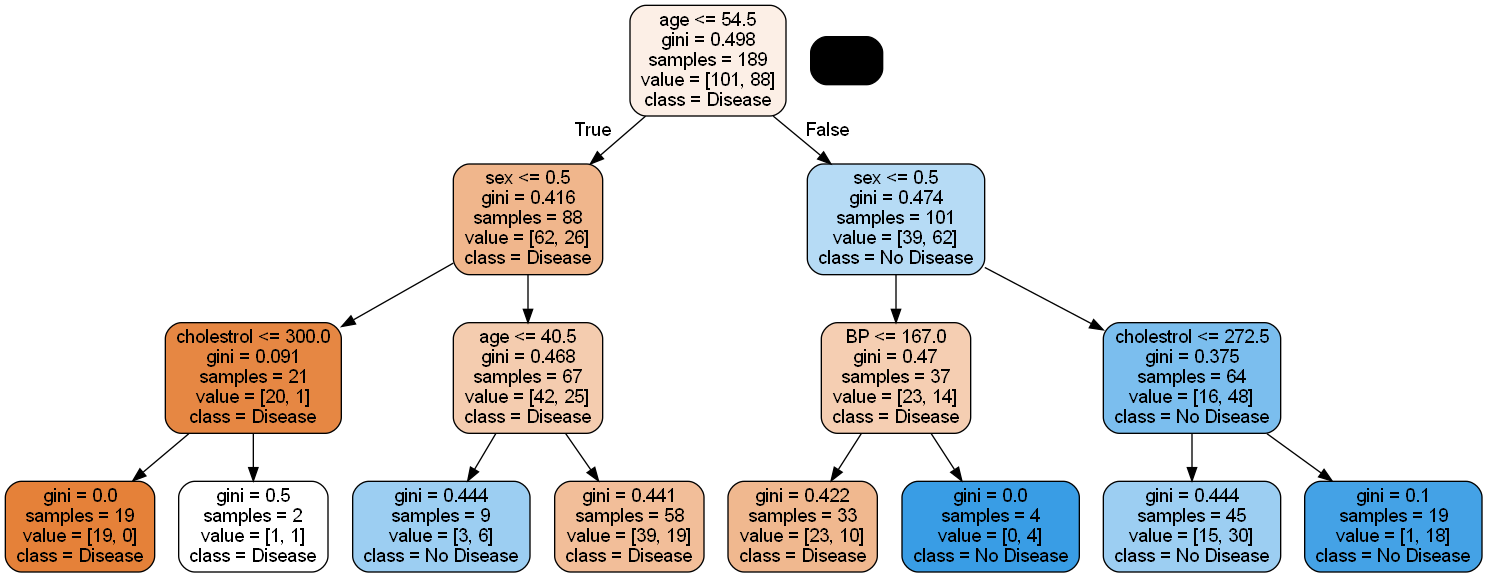

In [33]:
gph = get_dt_graph(dt)
Image(gph.create_png())

# Without setting any hyper-parameters

In [34]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

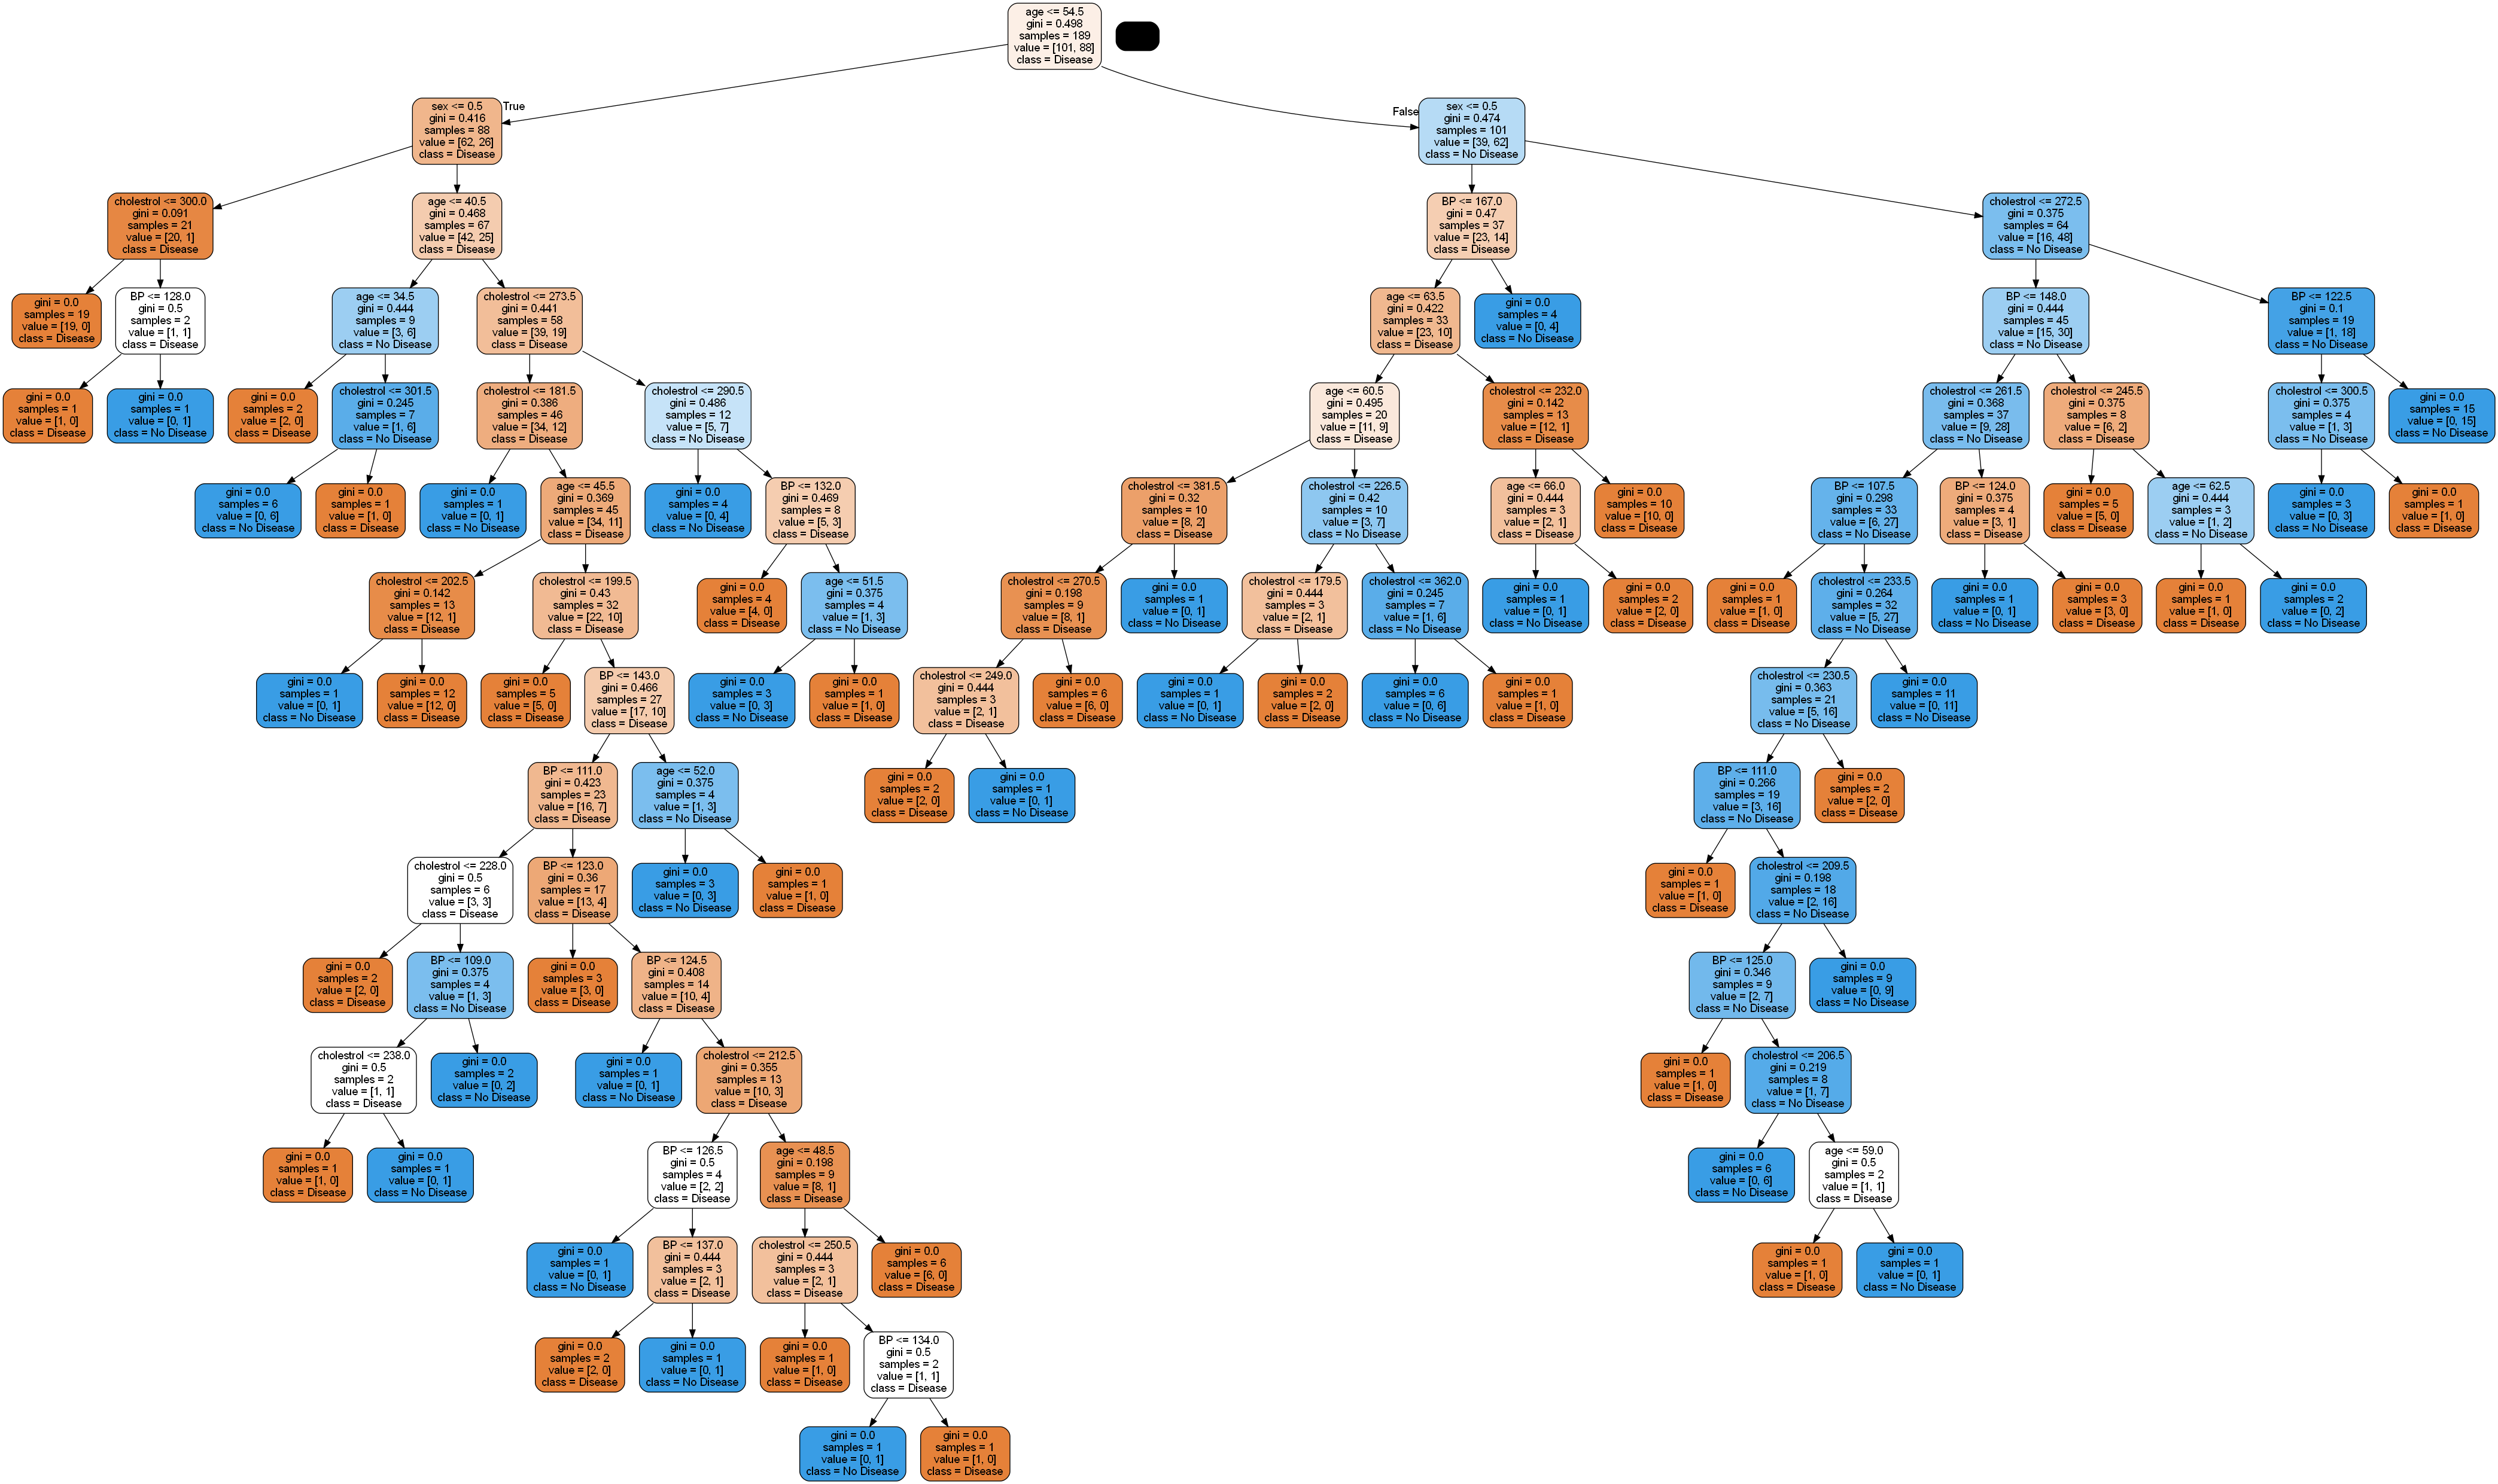

In [35]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [36]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train accuracy matrix
[[101   0]
 [  0  88]]
__________________________________________________
Test Accuracy : 0.6296296296296297
Test accuracy matrix
[[31 18]
 [12 20]]


# Controlling the depth of the tree

In [37]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

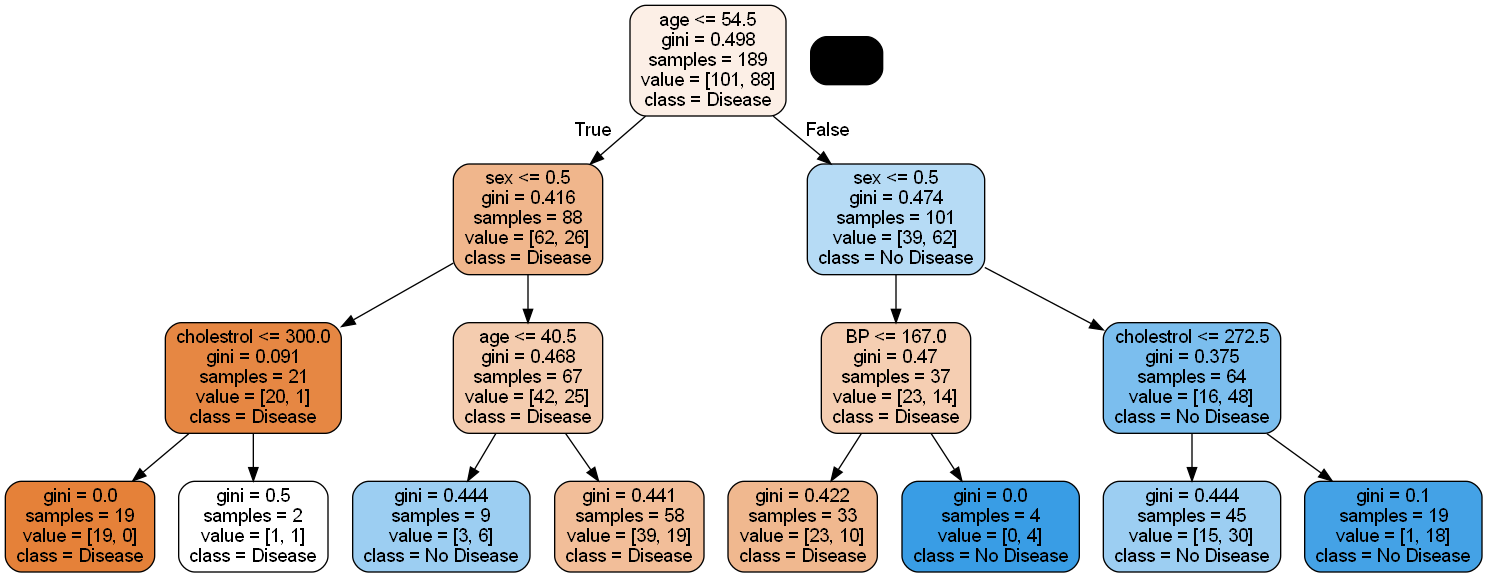

In [38]:
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [39]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train accuracy matrix
[[82 19]
 [30 58]]
__________________________________________________
Test Accuracy : 0.6049382716049383
Test accuracy matrix
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [40]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=20)

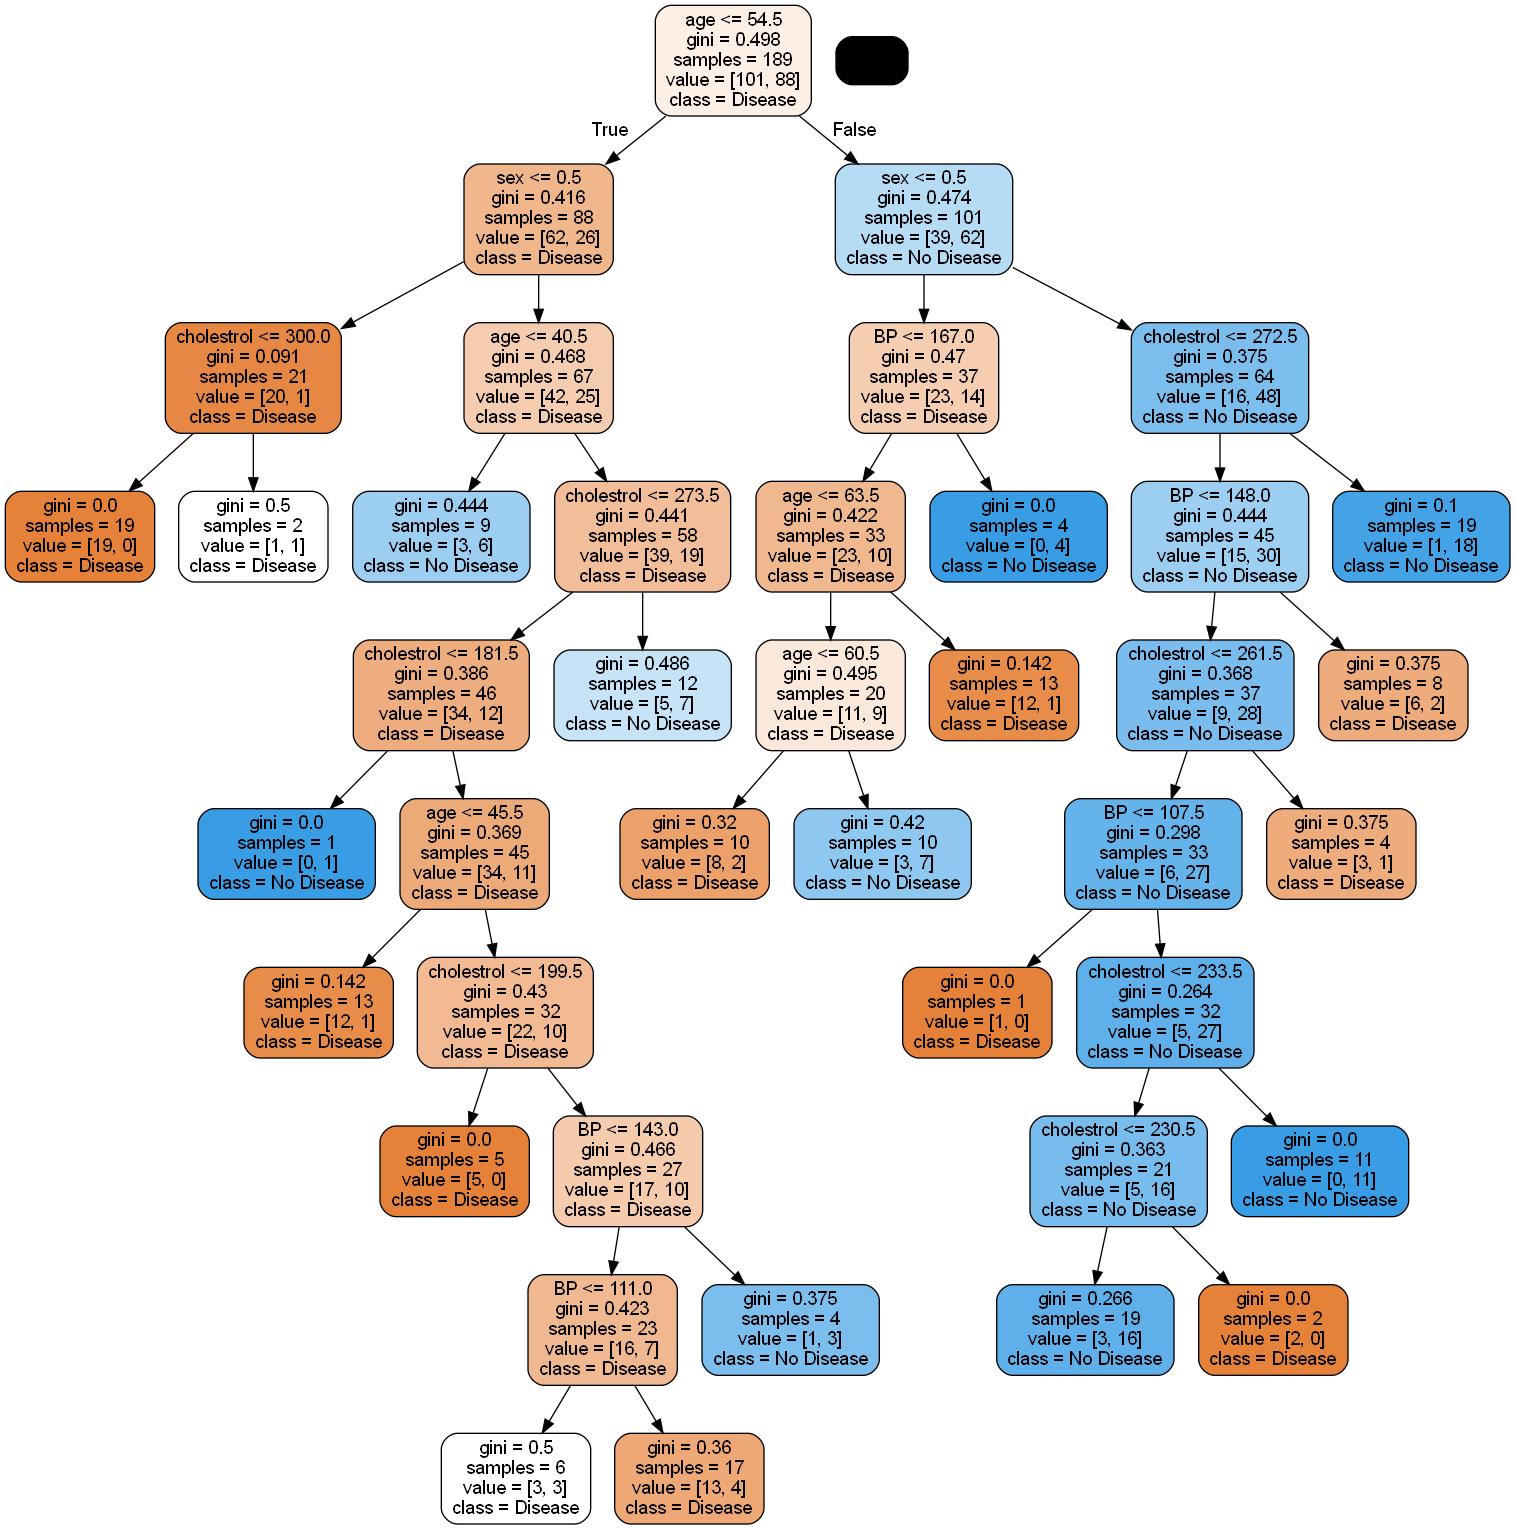

In [41]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [42]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train accuracy matrix
[[85 16]
 [15 73]]
__________________________________________________
Test Accuracy : 0.6419753086419753
Test accuracy matrix
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node


In [43]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

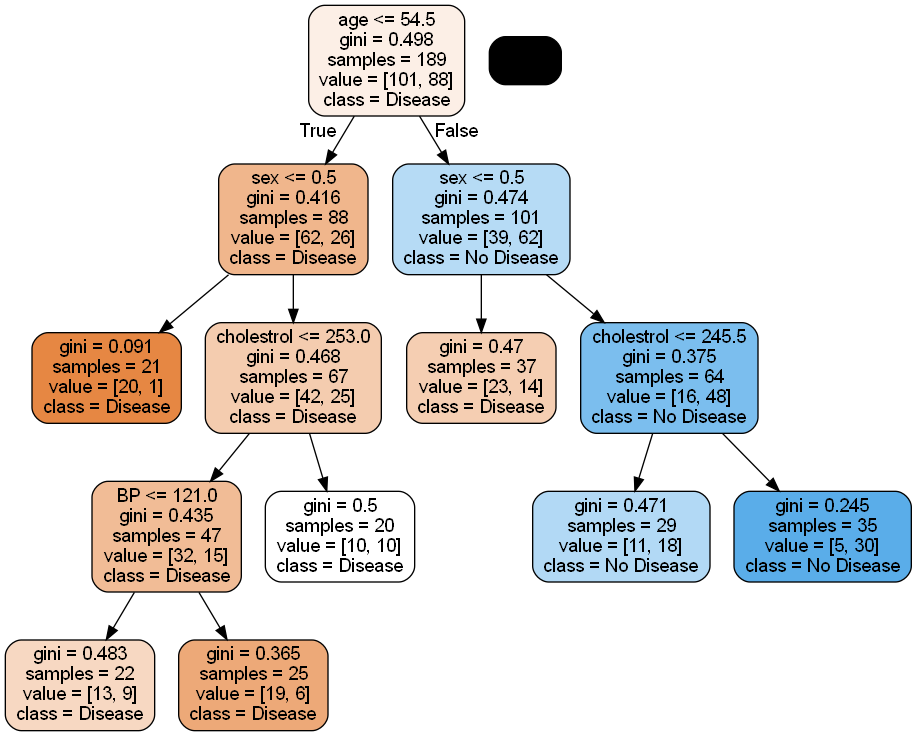

In [44]:
gph = get_dt_graph(dt_min_leaf) 
Image(gph.create_png())

In [45]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train accuracy matrix
[[85 16]
 [40 48]]
__________________________________________________
Test Accuracy : 0.6419753086419753
Test accuracy matrix
[[38 11]
 [18 14]]


# Use Entropy instead of Gini

In [46]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

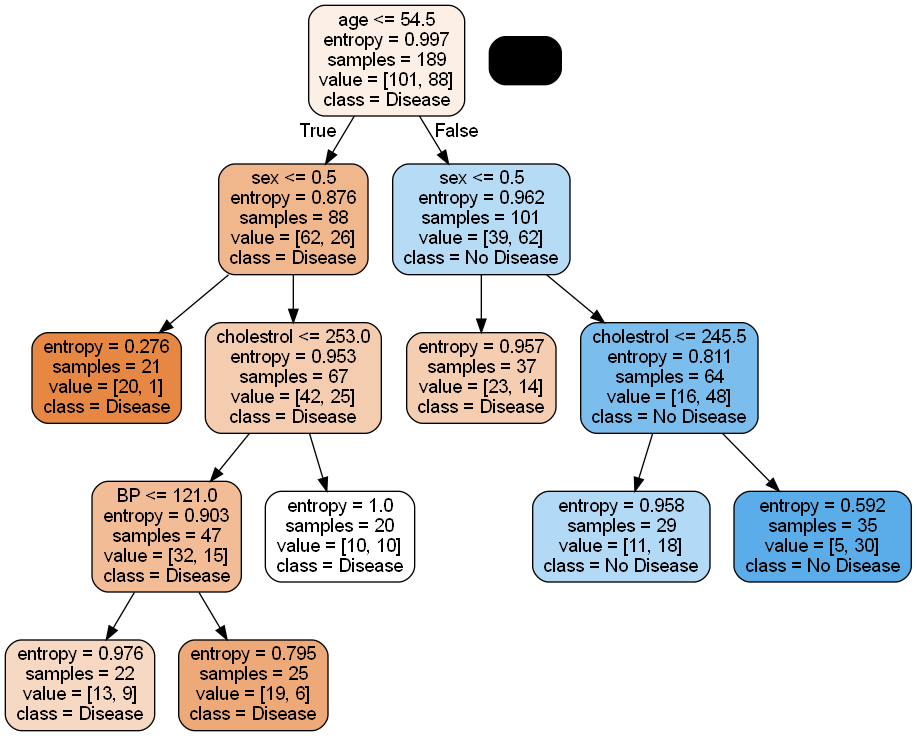

In [47]:
gph = get_dt_graph(dt_min_leaf_entropy) 
Image(gph.create_png())

In [48]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train accuracy matrix
[[85 16]
 [40 48]]
__________________________________________________
Test Accuracy : 0.6419753086419753
Test accuracy matrix
[[38 11]
 [18 14]]


# Hyper-parameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [51]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [52]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [53]:
%%time
grid_search.fit(X_train, Y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 3.45 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [54]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003000,4.578320e-07,0.001500,8.659283e-04,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.002751,4.320181e-04,0.000999,1.124618e-06,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.003000,7.067184e-04,0.002000,4.298152e-07,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.002510,8.613123e-04,0.002493,1.509886e-03,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.001750,4.330504e-04,0.001250,4.330846e-04,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [55]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.001750,0.000433,0.001005,8.743008e-06,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.002750,0.001479,0.002000,2.064765e-07,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.002510,0.000861,0.002493,1.509886e-03,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.002011,0.000013,0.001245,4.353340e-04,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.001750,0.000433,0.001000,3.526258e-07,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [56]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [57]:
dt_best = grid_search.best_estimator_

In [58]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train accuracy matrix
[[82 19]
 [34 54]]
__________________________________________________
Test Accuracy : 0.6172839506172839
Test accuracy matrix
[[36 13]
 [18 14]]


In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(Y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



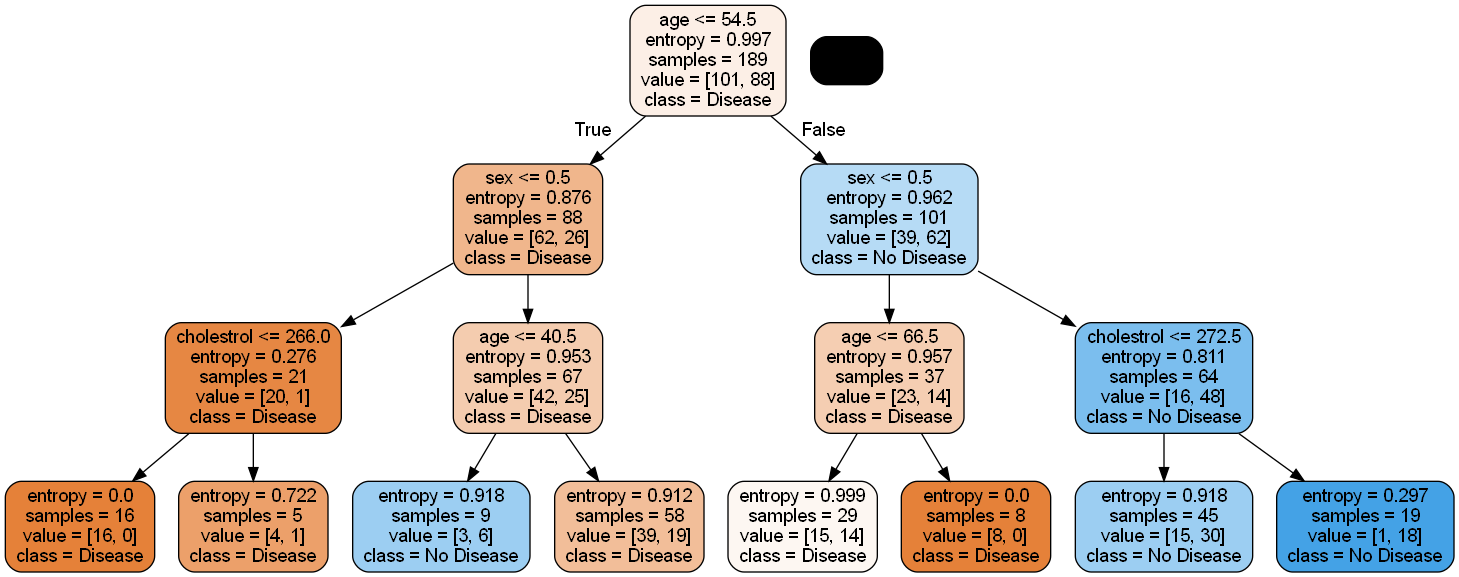

In [61]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### Random Forest


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [65]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [66]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [67]:
sample_tree = rf.estimators_[4]

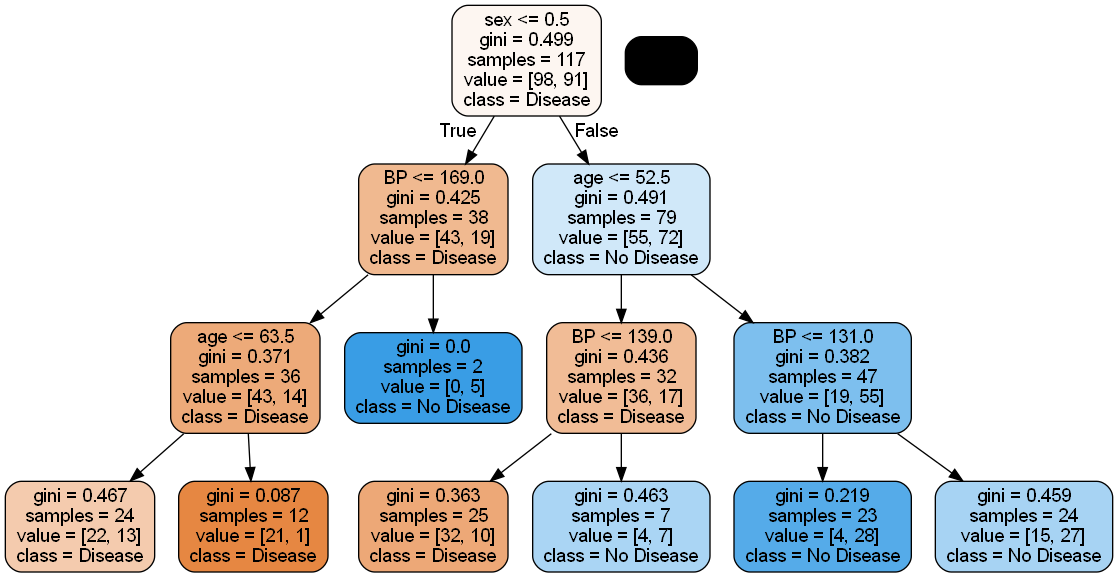

In [68]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

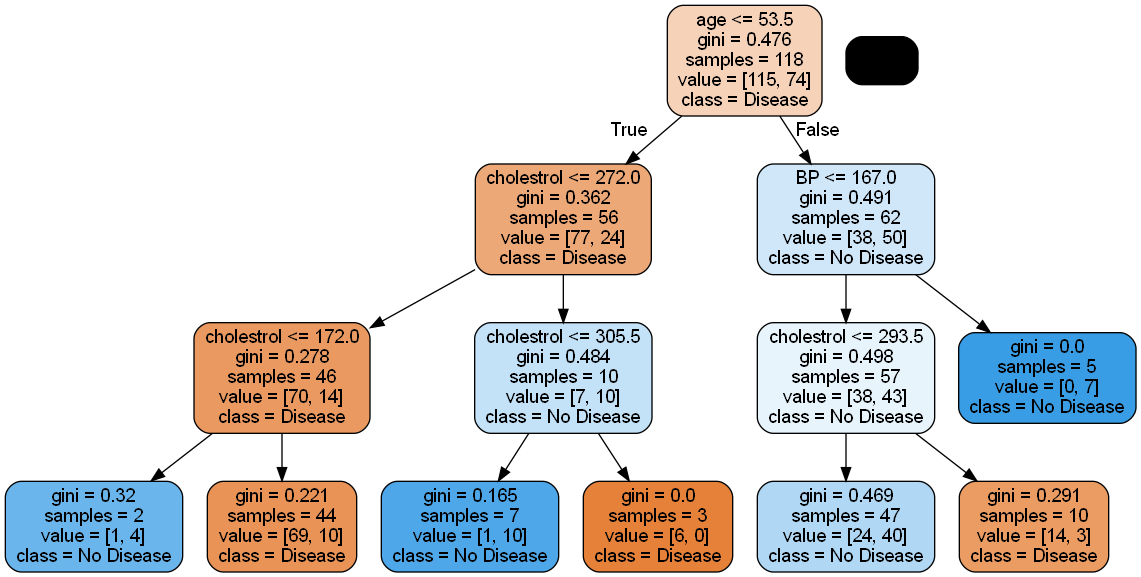

In [69]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

In [70]:
evaluate_model(rf)

Train Accuracy : 0.7407407407407407
Train accuracy matrix
[[80 21]
 [28 60]]
__________________________________________________
Test Accuracy : 0.6172839506172839
Test accuracy matrix
[[35 14]
 [17 15]]


#### Grid search for hyper-parameter tuning

In [72]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [73]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [74]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [76]:
%%time
grid_search.fit(X,Y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 36.6 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [77]:
rf_best = grid_search.best_estimator_

In [78]:
evaluate_model(rf_best)

Train Accuracy : 0.8042328042328042
Train accuracy matrix
[[87 14]
 [23 65]]
__________________________________________________
Test Accuracy : 0.8024691358024691
Test accuracy matrix
[[42  7]
 [ 9 23]]


In [79]:
sample_tree = rf_best.estimators_[0]

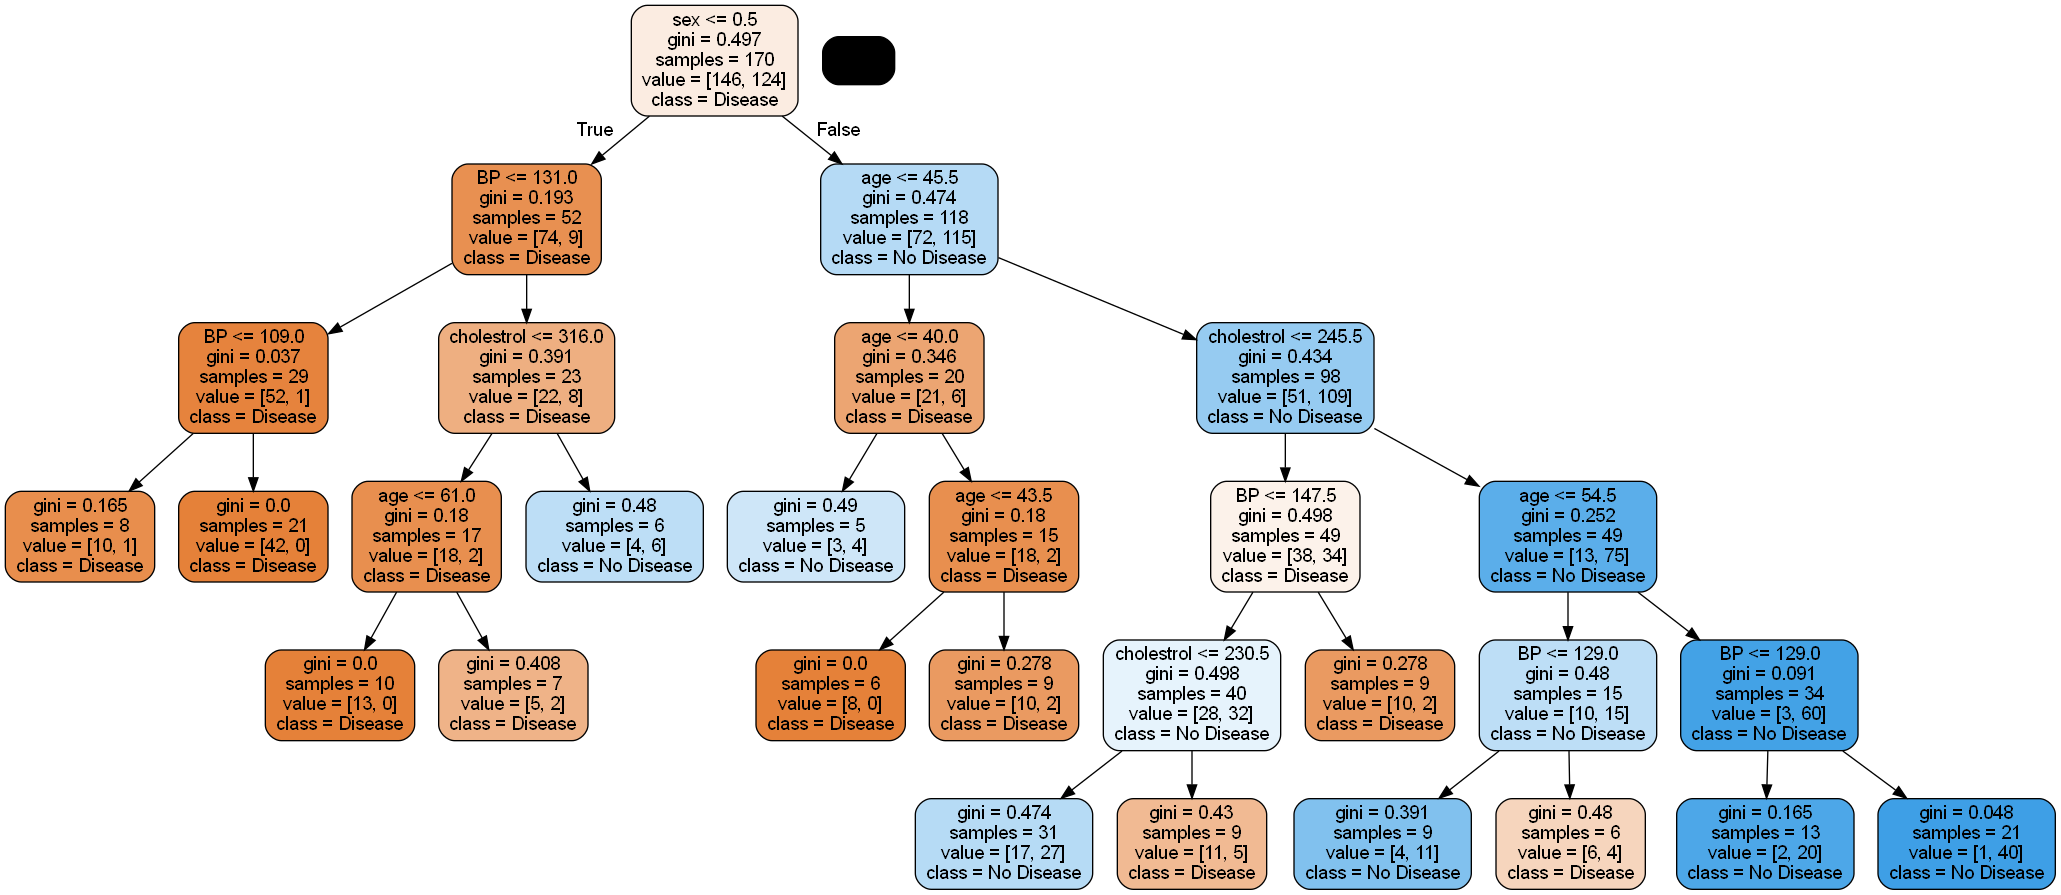

In [81]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

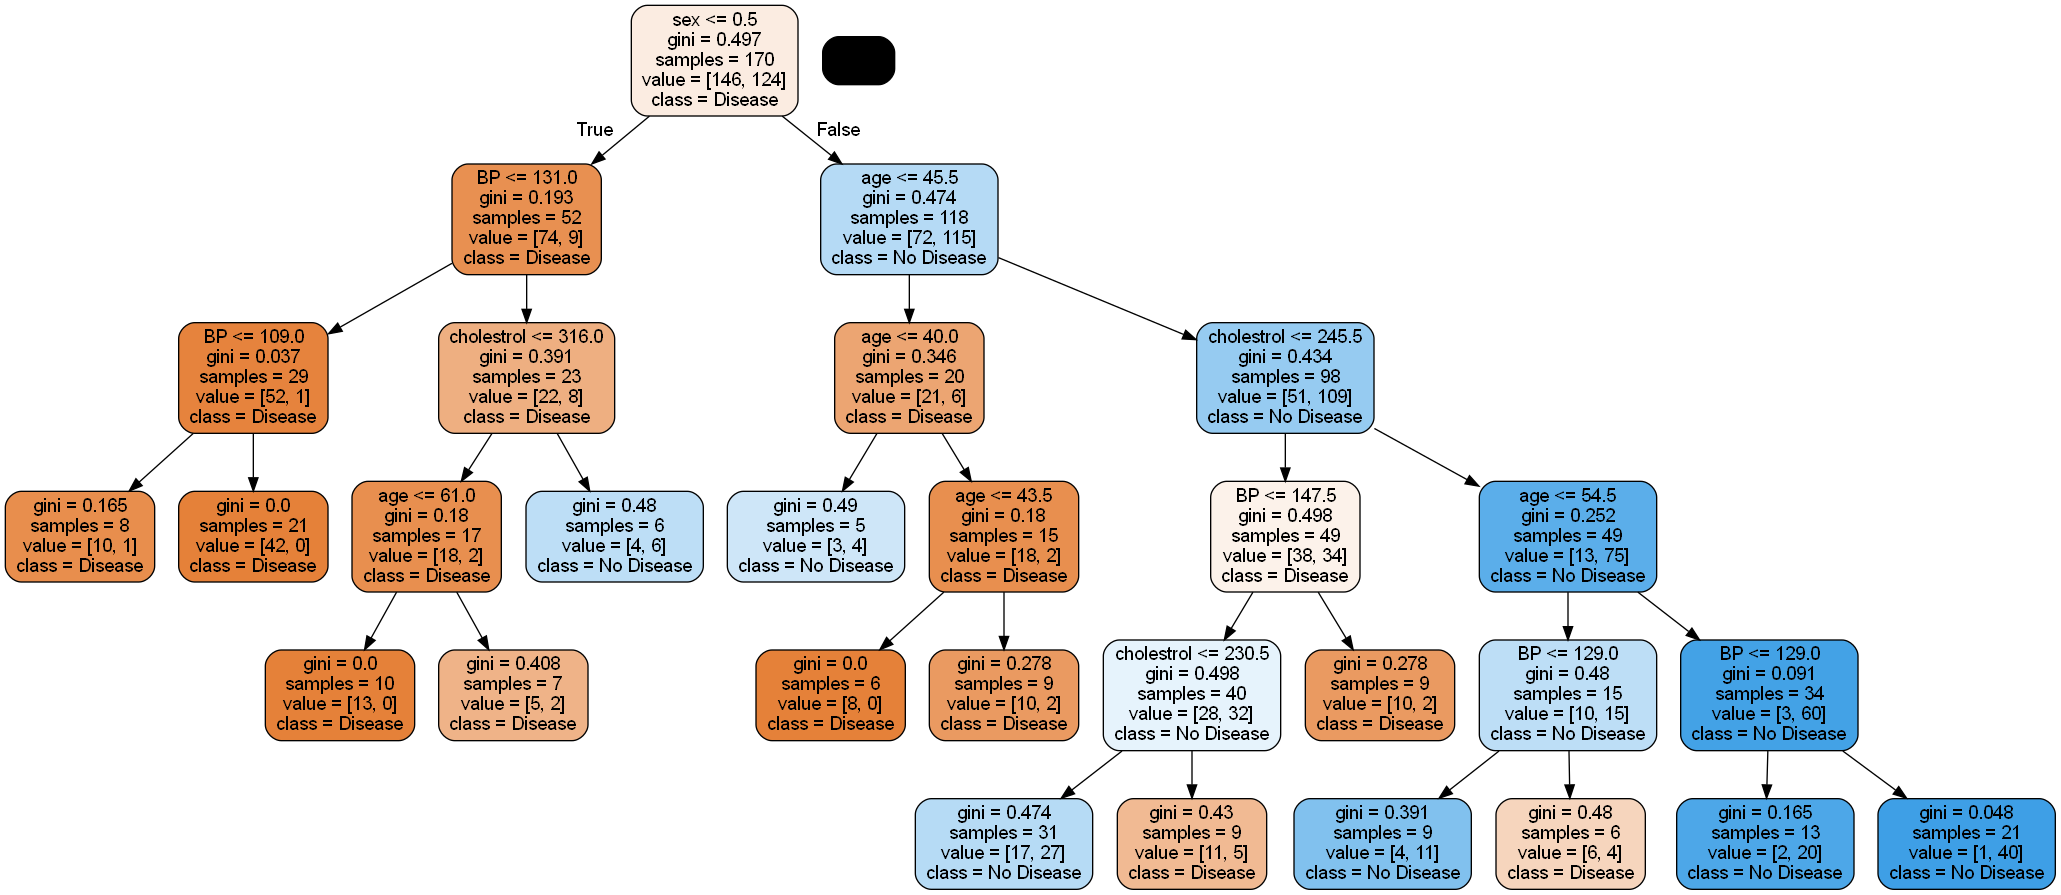

In [82]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

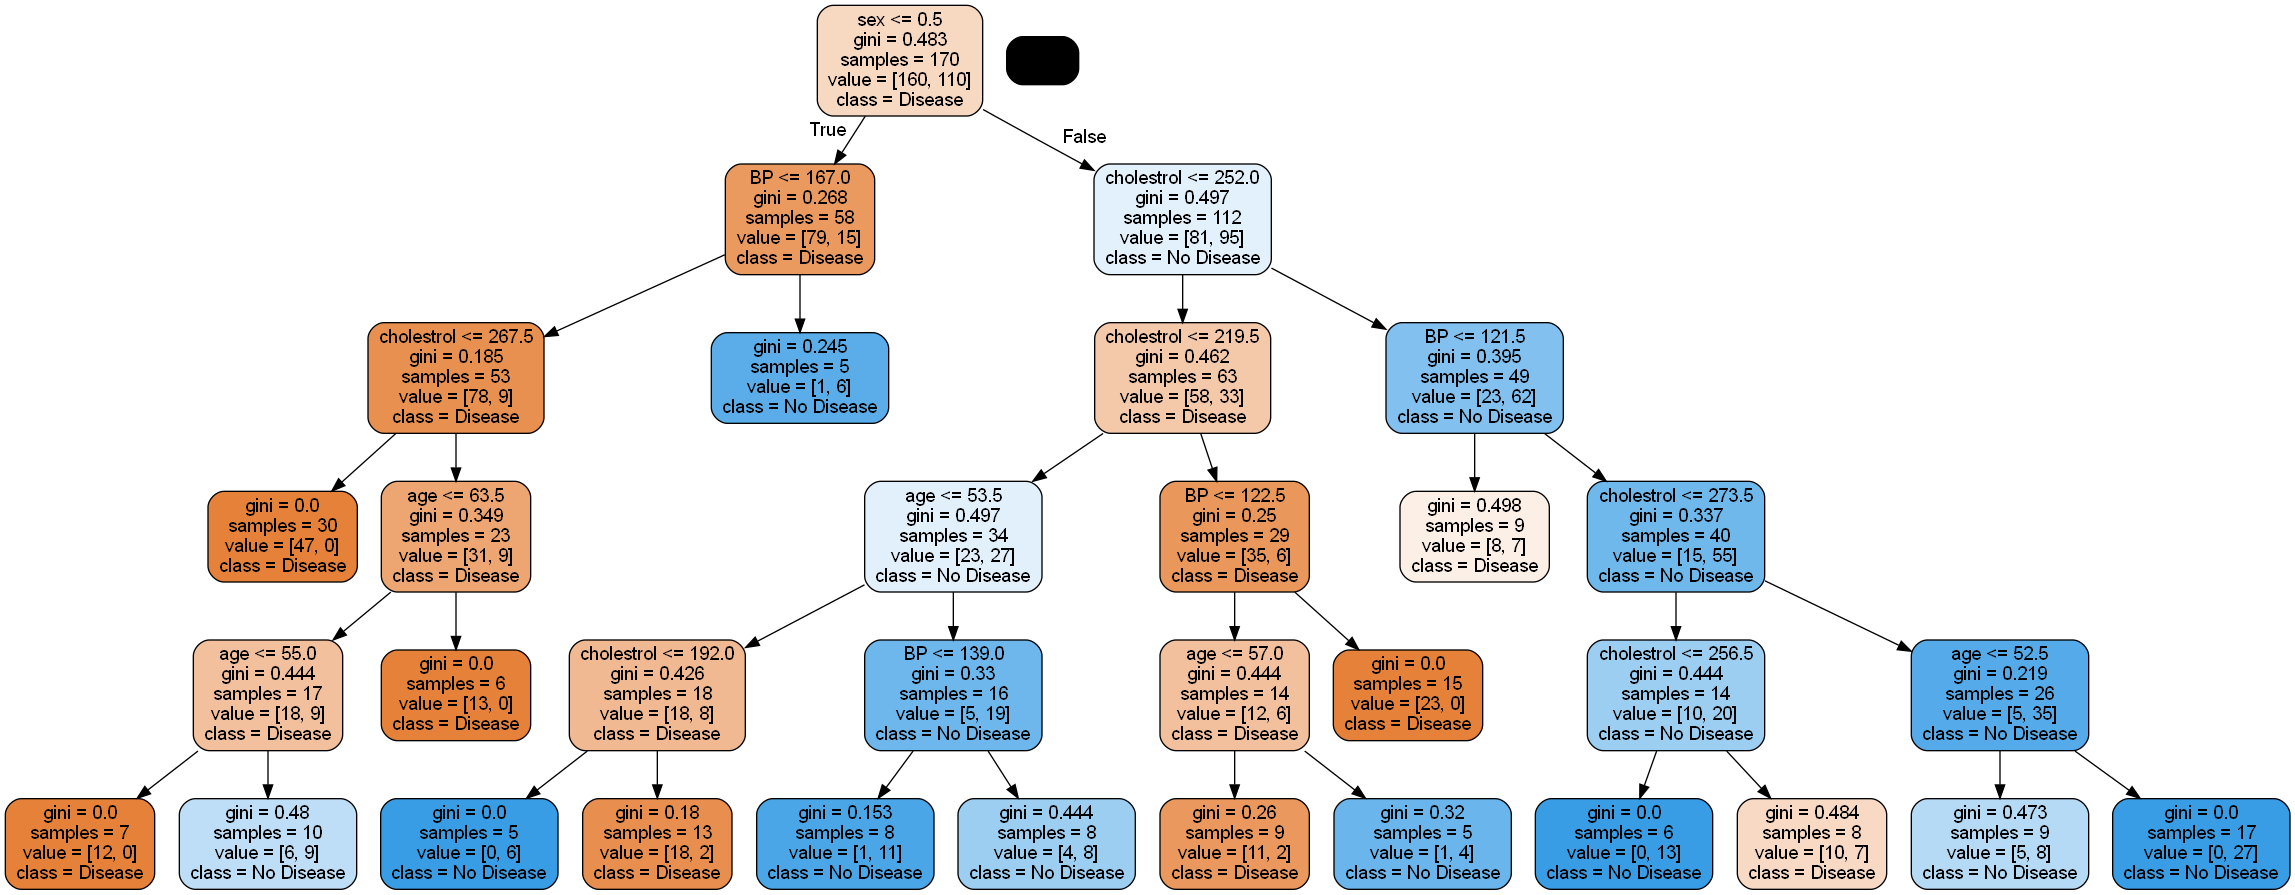

In [83]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

### Variable importance in RandomForest and Decision trees


In [84]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [86]:
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [87]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [88]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [89]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
